In [224]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
from pywaffle import Waffle

%matplotlib inline

In [2]:
foia_requests = pd.read_excel('FOIA_EPA_requests_2008_2017.xlsx', sheet_name='requests')
foia_requests

,Year,Component,Number of Requests Pending as of Start of Fiscal Year,Number of Requests Received in Fiscal Year,Number of Requests Processed in Fiscal Year,Number of Requests Pending as of End of Fiscal Year
0,2017,HQ,1050,3619,2822,1847
1,2017,Region 1,25,281,285,21
2,2017,Region 2,246,2132,2135,243
3,2017,Region 3,133,692,691,134
4,2017,Region 4,79,737,734,82
5,2017,Region 5,141,1711,1639,213
6,2017,Region 6,149,615,677,87
7,2017,Region 7,44,426,437,33
8,2017,Region 8,53,241,274,20
9,2017,Region 9,77,720,739,58


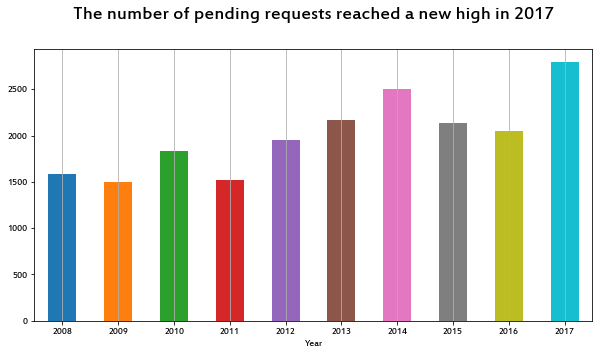

In [4]:
ax = foia_requests.groupby('Year')['Number of Requests Pending as of End of Fiscal Year'].sum().plot(x='Number of Requests Pending as of End of Fiscal Year', kind='bar', legend=False, figsize=(10, 5), rot=0)
ax.set_title('The number of pending requests reached a new high in 2017', pad=30)
ax.title.set_fontsize(20)
ax.grid(axis='x')

plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'lines.linewidth': 1,
    'lines.linestyle': '-',
    'lines.scale_dashes' : True,
    'patch.linewidth': 1,
    'font.family': 'sans-serif',
    'font.style': 'normal',
    'font.size': 9.5,
    'font.sans-serif': 'Estrangelo Edessa',
    'text.color': 'white',
    'figure.facecolor': '#03875b',
    'axes.facecolor': '#03875b',
    'axes.grid':True,
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'grid.color': 'white',
    'grid.linestyle': '--',
    'grid.linewidth': 0.75,
    'axes.axisbelow':True,
    'axes.spines.left':False,
    'axes.spines.right':False,
    'axes.spines.top': False,
    'axes.spines.bottom' : True,
    'axes.labelsize':'medium',
    'axes.labelpad': 4.0,
    'ytick.major.size': 0,     
    'ytick.minor.size': 0,
    'xtick.major.size': 0,
    'xtick.color':'white',
    'ytick.color':'white',
    'axes.labelcolor': 'white',
    'axes.edgecolor':'white',
    'axes.prop_cycle': cycler('color',['#fd9e0c'])
    })

#plt.savefig("FOIA_EPA_pending_bar.pdf")
plt.show()

In [5]:
foia_requests.groupby('Year')['Number of Requests Pending as of End of Fiscal Year'].sum()

Year
2008    1584
2009    1497
2010    1835
2011    1523
2012    1953
2013    2168
2014    2508
2015    2140
2016    2054
2017    2795
Name: Number of Requests Pending as of End of Fiscal Year, dtype: int64

In [6]:
foia_requests.groupby('Year')['Number of Requests Pending as of Start of Fiscal Year'].sum()

Year
2008    1727
2009    1584
2010    1497
2011    1835
2012    1523
2013    1348
2014    2168
2015    2508
2016    2149
2017    2079
Name: Number of Requests Pending as of Start of Fiscal Year, dtype: int64

In [3]:
exemptions = pd.read_excel('FOIA_EPA_requests_2008_2017.xlsx', sheet_name='exemptions')
exemptions.shape

(109, 16)

In [4]:
exemptions.head()

,Year,Component,Ex. 1,Ex. 2,Ex. 3,Ex. 4,Ex. 5,Ex. 6,Ex. 7(A),Ex. 7(B),Ex. 7©,Ex. 7(D),Ex. 7€,Ex. 7(F),Ex. 8,Ex. 9
0,2017,HQ,1,0,16,80,95,177,26,0,56,1,15,4,0,3
1,2017,Region 1,0,0,0,0,2,3,1,0,1,1,0,2,0,2
2,2017,Region 3,0,0,0,26,11,36,0,1,0,0,0,1,0,8
3,2017,Region 4,0,0,0,20,35,61,16,0,6,0,0,0,0,0
4,2017,Region 5,0,0,0,1,15,12,5,0,0,0,1,0,0,2


In [9]:
exemptions.groupby('Year')['Ex. 1'].sum()

Year
2008     1
2009     4
2010    18
2011     6
2012     0
2013     2
2014     1
2015     0
2016     0
2017     1
Name: Ex. 1, dtype: int64

In [10]:
exemptions['Ex. 1'].sum()

33

In [11]:
exemptions.groupby('Year')['Ex. 2'].sum()

Year
2008    33
2009    46
2010    29
2011    33
2012     8
2013    10
2014     2
2015     5
2016     4
2017     0
Name: Ex. 2, dtype: int64

In [12]:
exemptions.groupby('Year')['Ex. 3'].sum()

Year
2008    25
2009    22
2010    30
2011    14
2012    29
2013    18
2014    32
2015    11
2016    30
2017    19
Name: Ex. 3, dtype: int64

In [13]:
exemptions.groupby('Year')['Ex. 4'].sum()

Year
2008    229
2009    270
2010    237
2011    311
2012    190
2013     96
2014     94
2015    125
2016    185
2017    179
Name: Ex. 4, dtype: int64

In [14]:
exemptions.groupby('Year')['Ex. 5'].sum()

Year
2008    295
2009    288
2010    292
2011    430
2012    334
2013    225
2014    199
2015    196
2016    229
2017    228
Name: Ex. 5, dtype: int64

In [15]:
exemptions.groupby('Year')['Ex. 6'].sum()

Year
2008    132
2009    138
2010    167
2011    197
2012    202
2013    153
2014    180
2015    267
2016    346
2017    447
Name: Ex. 6, dtype: int64

In [16]:
exemptions.groupby('Year')['Ex. 7(A)'].sum()

Year
2008    123
2009    108
2010    123
2011    170
2012    126
2013     97
2014     66
2015     49
2016     78
2017     72
Name: Ex. 7(A), dtype: int64

In [17]:
exemptions.groupby('Year')['Ex. 7(B)'].sum()

Year
2008     1
2009     0
2010     8
2011     5
2012    14
2013     3
2014     2
2015     1
2016     1
2017     1
Name: Ex. 7(B), dtype: int64

In [18]:
#exemptions.groupby('Year')['Ex. 7(C)'].sum()
exemptions.groupby('Year')['Ex. 7(D)'].sum()

Year
2008    21
2009    11
2010     8
2011     4
2012    11
2013    60
2014    26
2015    15
2016    12
2017     2
Name: Ex. 7(D), dtype: int64

In [19]:
#exemptions.groupby('Year')['Ex. 7(E)'].sum()
exemptions.groupby('Year')['Ex. 7(F)'].sum()

Year
2008    0
2009    0
2010    1
2011    0
2012    2
2013    1
2014    0
2015    9
2016    9
2017    7
Name: Ex. 7(F), dtype: int64

In [20]:
exemptions.groupby('Year')['Ex. 8'].sum()

Year
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
Name: Ex. 8, dtype: int64

In [21]:
exemptions.groupby('Year')['Ex. 9'].sum()

Year
2008     0
2009     2
2010     0
2011     0
2012     4
2013     1
2014     3
2015    18
2016    38
2017    39
Name: Ex. 9, dtype: int64

In [5]:
re_exe = foia_requests.merge(exemptions, on= ['Component', 'Year'], how='left')
re_exe

,Year,Component,Number of Requests Pending as of Start of Fiscal Year,Number of Requests Received in Fiscal Year,Number of Requests Processed in Fiscal Year,Number of Requests Pending as of End of Fiscal Year,Ex. 1,Ex. 2,Ex. 3,Ex. 4,Ex. 5,Ex. 6,Ex. 7(A),Ex. 7(B),Ex. 7©,Ex. 7(D),Ex. 7€,Ex. 7(F),Ex. 8,Ex. 9
0,2017,HQ,1050,3619,2822,1847,1.0,0.0,16.0,80.0,95.0,177.0,26.0,0.0,56.0,1.0,15.0,4.0,0.0,3.0
1,2017,Region 1,25,281,285,21,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0
2,2017,Region 2,246,2132,2135,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,Region 3,133,692,691,134,0.0,0.0,0.0,26.0,11.0,36.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8.0
4,2017,Region 4,79,737,734,82,0.0,0.0,0.0,20.0,35.0,61.0,16.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
5,2017,Region 5,141,1711,1639,213,0.0,0.0,0.0,1.0,15.0,12.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
6,2017,Region 6,149,615,677,87,0.0,0.0,1.0,5.0,5.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,2017,Region 7,44,426,437,33,0.0,0.0,2.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2017,Region 8,53,241,274,20,0.0,0.0,0.0,17.0,29.0,36.0,13.0,0.0,7.0,0.0,1.0,0.0,0.0,9.0
9,2017,Region 9,77,720,739,58,0.0,0.0,0.0,13.0,17.0,30.0,8.0,0.0,2.0,0.0,0.0,0.0,0.0,14.0


In [23]:
re_exe.shape

(110, 20)

In [24]:
### Now when merging rows disappear, how can I prevent that from happening?
# the default setting when useing pd.merge is how='inner' meaning only rows which appear in both dfs will be kept, 
#if you want to change this and keep every row you change it to how='left'

In [6]:
backlog = pd.read_excel('FOIA_EPA_requests_2008_2017.xlsx', sheet_name='backlog')
backlog.head()

,Year,Component,Number of Backlogged Requests as of the End of Fiscal Year,Number of Backlogged Appeals as of End of Fiscal Year
0,2017,HQ,1529,125
1,2017,Region 1,3,0
2,2017,Region 2,121,0
3,2017,Region 3,49,0
4,2017,Region 4,29,0


In [9]:
backlog.groupby('Year').sum()

,Number of Backlogged Requests as of the End of Fiscal Year,Number of Backlogged Appeals as of End of Fiscal Year
Year,,
2008,783,151
2009,332,79
2010,329,77
2011,326,64
2012,468,57
2013,1265,157
2014,1688,188
2015,1355,174
2016,1284,113


In [26]:
re_exe_back = re_exe.merge(backlog, on=['Component', 'Year'], how='left')
re_exe_back.shape

(110, 22)

In [103]:
granted_denied = pd.read_excel('FOIA_EPA_requests_2008_2017.xlsx', sheet_name='granted_denied')
granted_denied.head()

,Year,Component,No. of Full Grants,No. of Partial Grants/ Partial Denials,No. of Full Denials Based on Exemptions,No Records,All Records Referred,Request Withdrawn,Fee-Related Reason,Not Reasonably Described,Improper FOIA request,Not Agency Record,Duplicate Request,Other,Total
0,2017,HQ,1084,376,67,254,8,316,11,451,98,6,130,21,2822
1,2017,Region 1,146,12,0,88,1,28,0,0,0,0,10,0,285
2,2017,Region 2,1796,4,0,176,0,75,1,43,9,0,31,0,2135
3,2017,Region 3,325,61,1,213,0,64,0,3,4,3,17,0,691
4,2017,Region 4,281,85,0,271,0,72,0,0,2,0,23,0,734


In [82]:
granted_denied.sort_values(by='No Records', ascending=False)

,Year,Component,No. of Full Grants,No. of Partial Grants/ Partial Denials,No. of Full Denials Based on Exemptions,No Records,All Records Referred,Request Withdrawn,Fee-Related Reason,Not Reasonably Described,Improper FOIA request,Not Agency Record,Duplicate Request,Other,Total
16,2016,Region 5,598,30,0,875,1,111,19,4,4,7,37,1,1687
5,2017,Region 5,542,29,1,863,0,136,14,2,9,1,42,0,1639
9,2017,Region 9,184,59,4,419,0,39,8,4,2,4,16,0,739
20,2016,Region 9,180,39,0,389,4,44,10,4,0,3,12,0,685
14,2016,Region 3,261,98,3,384,1,62,14,2,3,5,28,0,861
13,2016,Region 2,1643,13,1,340,0,67,2,63,33,0,31,0,2193
15,2016,Region 4,319,104,0,309,8,75,1,8,5,0,18,0,847
4,2017,Region 4,281,85,0,271,0,72,0,0,2,0,23,0,734
17,2016,Region 6,299,16,2,261,1,82,0,0,1,0,15,0,677
0,2017,HQ,1084,376,67,254,8,316,11,451,98,6,130,21,2822


In [ ]:
##DO A GRAPH ON THE MOST POPULAR REASONS FOR WITHHELDING INFO

In [ ]:
foia = re_exe_back.merge(granted_denied, on=['Component', 'Year'], how='left')
foia.shape

In [ ]:
foia.head()

In [ ]:
foia.dtypes

In [ ]:
foia.rename(columns={'Ex. 7©':'Ex_7C', 'Ex. 7€': 'Ex_7E'}, inplace=True)

In [ ]:
foia.dtypes

In [ ]:
#foia.to_csv('EPA_foia_2008-2017.csv', index=False)

In [ ]:
exemptions.rename(columns={'Ex. 7©':'Ex_7C', 'Ex. 7€': 'Ex_7E'}, inplace=True)
exemptions.head()

In [ ]:
exemptions.groupby('Year').sum()

In [ ]:
ax = exemptions.groupby('Year').sum().reset_index().plot(x='Year', figsize=(9,5), legend=False)
ax.set_title("The one time personal privacy matters", pad=20)
ax.title.set_fontsize(20)

plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'lines.linewidth': 1.25,
    'lines.linestyle': '-',
    'lines.scale_dashes' : True,
    'patch.linewidth': 1,
    'font.family': 'sans-serif',
    'font.style': 'normal',
    'font.size': 9.5,
    'font.sans-serif': 'Estrangelo Edessa',
    'text.color': 'white',
    'figure.facecolor': '#03875b',
    'axes.facecolor': '#03875b',
    'axes.grid':True,
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'grid.color': 'white',
    'grid.linestyle': ':',
    'grid.linewidth': 0.75,
    'axes.axisbelow':True,
    'axes.spines.left':False,
    'axes.spines.right':False,
    'axes.spines.top': False,
    'axes.spines.bottom' : False,
    'axes.labelsize':'medium',
    'axes.labelpad': 4.0,
    'ytick.major.size': 0,     
    'ytick.minor.size': 0,
    'xtick.major.size': 0,
    'xtick.color':'white',
    'ytick.color':'white',
    'axes.labelcolor': 'white',
    'axes.edgecolor':'white',
    'axes.prop_cycle': cycler('color',['#82b243', '#82b243', '#82b243', '#82b243', '#fd9e0c', '#fff600', '#82b243', '#82b243', '#82b243', '#82b243', '#82b243', '#82b243', '#82b243', '#82b243'])
    })

#plt.savefig("FOIA_EPA_exe_linegraph.pdf")
plt.show()

In [ ]:
df_Ex1 = exemptions.groupby('Year')['Ex. 1'].sum().reset_index()
df_Ex1.plot(x='Year')

In [ ]:
## Follow up: Is exe 6 successful? Could the EPA keep denying info with Exe. 6 or was it appealed?
## What's with the former favorite, Exe 5.? Why did it get replaced? Was it more succesful than Exe 6.?

In [ ]:
##DO A GRAPH ABOUT SUCESSFUL APPEALS AND REASONS FOR REMAINING DENIALS

In [82]:
df_appeal2017 = pd.read_csv('tabula-2017_foia_annual_report.csv')
df_appeal2017.columns = df_appeal2017.iloc[0]
df_appeal2017 = df_appeal2017.iloc[1:]
df_appeal2017.rename(columns={np.nan: 'Component'}, inplace=True)
df_appeal2017['Year'] = 2017
df_appeal2017

,Component,Number of Affirmed on Appeal,Number Partially Affirmed & Partially Reversed/Remanded on Appeal,Number of Completely Reversed/Remanded on Appeal,Number of Appeals Closed for Other Reasons,TOTAL,Year
1,HQ,54,35,34,81,204,2017


In [174]:
df_appeal2017.drop(columns={'Component'}, inplace=True)

In [179]:
df_appeal2017.astype(int)

,Number of Affirmed on Appeal,Number Partially Affirmed & Partially Reversed/Remanded on Appeal,Number of Completely Reversed/Remanded on Appeal,Number of Appeals Closed for Other Reasons,TOTAL,Year
1,54,35,34,81,204,2017


In [59]:
df_exe2017 = pd.read_csv('tabula-exe_2017_foia_annual_report.csv')
df_exe2017.rename(columns={'Unnamed: 0': 'Component'}, inplace=True)
df_exe2017['Total'] = df_exe2017.sum(axis=1)

In [60]:
df_exe2017

,Component,Ex. 1,Ex. 2,Ex. 3,Ex. 4,Ex. 5,Ex. 6,Ex. 7(A),Ex. 7(B),Ex. 7(C),Ex. 7(D),Ex. 7(E),Ex. 7(F),Ex. 8,Ex. 9,Total
0,HQ,0,0,0,0,10,9,1,0,5,0,0,0,0,0,25


In [354]:
df_reasons2017 = pd.read_csv('tabula-2017_other_foia_annual_report.csv')
df_reasons2017.columns = df_reasons2017.iloc[0]
df_reasons2017['Exemption'] = 25
df_reasons2017

,nan,No records,Records referred at initial request level,Request withdrawn,Fee-related reason,Records not reasonably described,Improper request for other reasons,Not agency record,Duplicate request or appeal,Request in litigation,Appeal based solely on denial for expedited processing,Other,Exemption
0,NaN,No\rrecords,Records\rreferred at\rinitial\rrequest\rlevel,Request\rwithdrawn,Fee-related\rreason,Records not\rreasonably\rdescribed,Improper\rrequest\rfor other\rreasons,Not\ragency\rrecord,Duplicate\rrequest or\rappeal,Request\rin\rlitigation,Appeal\rbased\rsolely on\rdenial for\rexpedite...,Other,25
1,HQ,5,1,24,16,10,6,0,14,4,4,30,25
2,TOTAL,5,1,24,16,10,6,0,14,4,4,30,25


In [355]:
df_reasons2017 = df_reasons2017.iloc[1:,1:]
df_reasons2017 = df_reasons2017.drop([1])

In [356]:
#df_reasons2017['Total'] = df_reasons2017.sum(axis=1, skipna=True, numeric_only=True)

In [357]:
#df_reasons2017['Total'] = 139
#df_reasons2017['Year'] = 2017

In [384]:
df_reasons2017 = pd.DataFrame({
    'Type_of_reason':['Other', 'Exemption', 'Request withdrawn', 'Fee-related reason', 'Duplicate request or appeal', 'Records not reasonably described', 'Improper request for other reasons', 'No records', 'Request in litigation', 'Appeal based solely on denial for expedited processing', 'Records referred at initial request level', 'Not agency record'],
    'Number': [30, 25, 24, 16, 14, 10, 6, 5, 4, 4, 1, 0]
})

C:\Users\Catharina\AppData\Local\Programs\Python\Python35-32\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


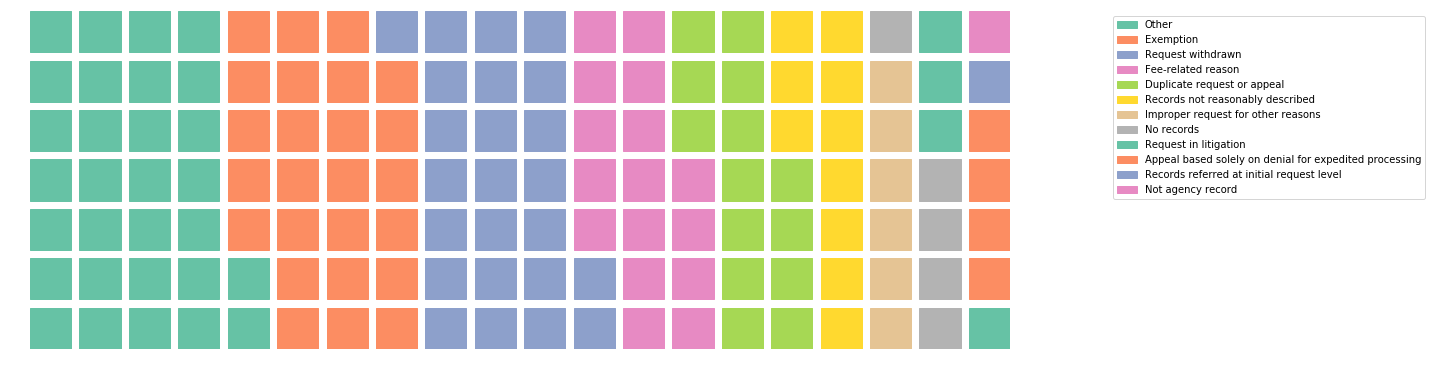

In [392]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=7,
    values=df_reasons2017.Number.astype(int),
    #values = eval(values)
    labels=list(df_reasons2017.Type_of_reason),
    figsize=(20, 15),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42})
plt.savefig('Legend_Appeals_Denial.pdf')
plt.show()

In [ ]:
requests = granted_denied.groupby('Year').sum()

In [100]:
requests.head()

,No. of Full Grants,No. of Partial Grants/ Partial Denials,No. of Full Denials Based on Exemptions,No Records,All Records Referred,Request Withdrawn,Fee-Related Reason,Not Reasonably Described,Improper FOIA request,Not Agency Record,Duplicate Request,Other,Total,No. of Full Denials
Year,,,,,,,,,,,,,,
2016,5179,767,67,3062,24,820,73,114,95,21,257,19,10498,4552
2017,5083,781,77,2740,10,1038,42,507,131,19,353,21,10802,4938


In [ ]:
def get_denials(row):
    val = row['Total'] - row['No. of Full Grants'] - row['No. of Partial Grants/ Partial Denials']
    return val

In [ ]:
requests['No. of Full Denials'] = requests.apply(get_denials, axis=1)

In [104]:
requests.head()

,No. of Full Grants,No. of Partial Grants/ Partial Denials,No. of Full Denials Based on Exemptions,No Records,All Records Referred,Request Withdrawn,Fee-Related Reason,Not Reasonably Described,Improper FOIA request,Not Agency Record,Duplicate Request,Other,Total,No. of Full Denials
Year,,,,,,,,,,,,,,
2016,5179,767,67,3062,24,820,73,114,95,21,257,19,10498,4552
2017,5083,781,77,2740,10,1038,42,507,131,19,353,21,10802,4938


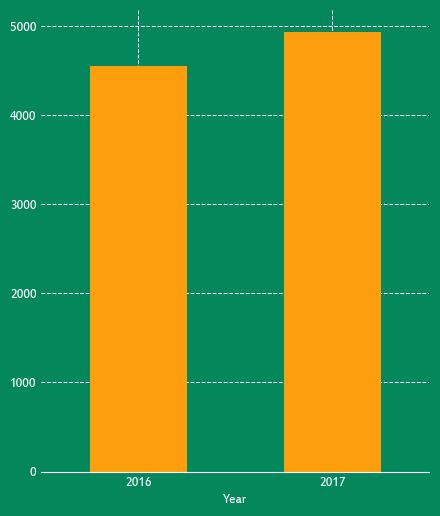

In [102]:
requests['No. of Full Denials'].plot(kind='bar', x='Year', rot=0, figsize=(5,6))

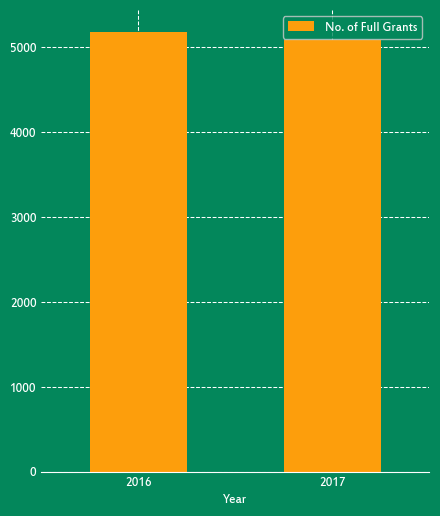

In [106]:
requests['No. of Full Grants'].reset_index().plot(kind='bar', x='Year', rot=0, figsize=(5,6))

In [108]:
df = pd.DataFrame({
    'year' : [2016, 2017],
    'no. full grants': [5179, 5083],
    'no. of full denials': [4552, 4938]
})

df

,no. full grants,no. of full denials,year
0,5179,4552,2016
1,5083,4938,2017


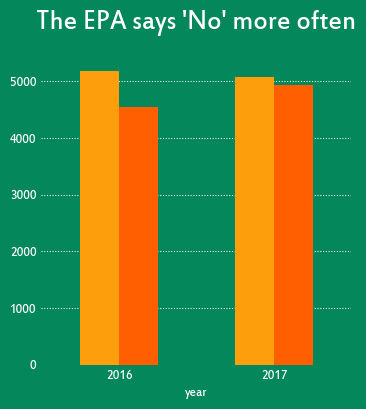

In [117]:
ax = df.plot(kind='bar', x='year', rot = 0, figsize=(4,4), legend=False)
ax.set_title("The EPA says 'No' more often", pad=20)
ax.title.set_fontsize(20)
ax.grid(axis='x')

plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'lines.linewidth': 1.25,
    'lines.linestyle': '-',
    'lines.scale_dashes' : True,
    'patch.linewidth': 1,
    'font.family': 'sans-serif',
    'font.style': 'normal',
    'font.size': 9.5,
    'font.sans-serif': 'Estrangelo Edessa',
    'text.color': 'white',
    'figure.facecolor': '#03875b',
    'axes.facecolor': '#03875b',
    'axes.grid':True,
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'grid.color': 'white',
    'grid.linestyle': ':',
    'grid.linewidth': 0.75,
    'axes.axisbelow':True,
    'axes.spines.left':False,
    'axes.spines.right':False,
    'axes.spines.top': False,
    'axes.spines.bottom' : False,
    'axes.labelsize':'medium',
    'axes.labelpad': 4.0,
    'ytick.major.size': 0,     
    'ytick.minor.size': 0,
    'xtick.major.size': 0,
    'xtick.color':'white',
    'ytick.color':'white',
    'axes.labelcolor': 'white',
    'axes.edgecolor':'white',
    'axes.prop_cycle': cycler('color',['#fd9e0c', '#ff5f00','#e22525', '#82b243', '#82b243', '#82b243', '#82b243', '#82b243', '#82b243', '#82b243'])
    })

#plt.savefig("FOIA_EPA_access_bar.pdf")
plt.show()

In [393]:
dfObama = pd.DataFrame({
    'year' : [2007, 2008],
    'no. full grants': [4613, 4712],
    'no. of full denials': [6829, 6385]
})

dfObama

,no. full grants,no. of full denials,year
0,4613,6829,2007
1,4712,6385,2008


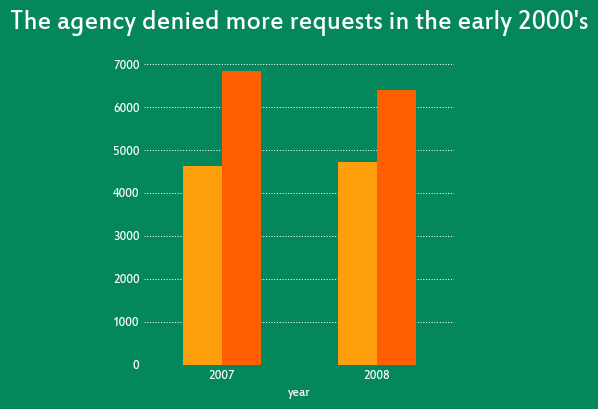

In [398]:
ax = dfObama.plot(kind='bar', x='year', rot = 0, figsize=(4,4), legend=False)
ax.set_title("The agency denied more requests in the early 2000's", pad=20)
ax.title.set_fontsize(20)
ax.grid(axis='x')

plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'lines.linewidth': 1.25,
    'lines.linestyle': '-',
    'lines.scale_dashes' : True,
    'patch.linewidth': 1,
    'font.family': 'sans-serif',
    'font.style': 'normal',
    'font.size': 9.5,
    'font.sans-serif': 'Estrangelo Edessa',
    'text.color': 'white',
    'figure.facecolor': '#03875b',
    'axes.facecolor': '#03875b',
    'axes.grid':True,
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'grid.color': 'white',
    'grid.linestyle': ':',
    'grid.linewidth': 0.75,
    'axes.axisbelow':True,
    'axes.spines.left':False,
    'axes.spines.right':False,
    'axes.spines.top': False,
    'axes.spines.bottom' : False,
    'axes.labelsize':'medium',
    'axes.labelpad': 4.0,
    'ytick.major.size': 0,     
    'ytick.minor.size': 0,
    'xtick.major.size': 0,
    'xtick.color':'white',
    'ytick.color':'white',
    'axes.labelcolor': 'white',
    'axes.edgecolor':'white',
    'axes.prop_cycle': cycler('color',['#fd9e0c', '#ff5f00','#e22525', '#82b243', '#82b243', '#82b243', '#82b243', '#82b243', '#82b243', '#82b243'])
    })

plt.savefig("Obama_FOIA_EPA_access_bar.pdf")
plt.show()

In [ ]:
b3_exemptions = pd.read_excel('FOIA_EPA_requests_2008_2017.xlsx', sheet_name='b3_exemptions')
b3_exemptions.head()

In [ ]:
## Maybe you shouldn't merge b3 with anything at all?!

#exe_b3 = exemptions.merge(b3_exemptions, on=['Component', 'Year'], how='left')
#exe_b3.head()